# Customer Churn  Prediction (TeleComm.) 2
This notebook serves as a continuation of the previous notebook on customer churn within this repository. 

Our objective remains focused on adopting a data-centric approach.

For this churn prediction task, we will be working with a different dataset. However, we will maintain the same preprocessing techniques used in the previous dataset. By the end of this notebook, we will compare the results and determine the impact of data quality on the specific machine learning task at hand.

For more information about the dataset use the following Kaggle link:
https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?select=churn-bigml-80.csv

## Stage: 1

In [1]:
import pandas as pd
import numpy as np

## Reading and Cleaning the Data

In [2]:
df = pd.read_csv("data/churn-bigml-80.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [4]:
sample_size = 25
target_column = 'Churn'

In [5]:
number_of_samples = df.shape[0]
percentage_null = (missing_values / number_of_samples) * 100

print("Null values per Column greater than or equal to 25% Original dataset")
print(percentage_null[percentage_null >= sample_size])

Null values per Column greater than or equal to 25% Original dataset
Series([], dtype: float64)


In [6]:
null_cols_drop = percentage_null[percentage_null >=sample_size].keys().tolist()

df.drop(columns=null_cols_drop, inplace=True)
df.drop(columns="Area code", inplace=True)

df.dropna(inplace=True)

print(df.shape)

(2666, 19)


## Data Preprocessing and Splitting

In [7]:
df[target_column] = df[target_column].map({True: 1, False: 0})

In [8]:
df_origin = df.copy()

df_y = df.pop(target_column)

# Categorical Features

data_types = df.dtypes
categorical_features = data_types[data_types == 'object'].index

# Numerical Features

data_types = df.dtypes
numerical_features = data_types[data_types != 'object'].index

# print("Categorical features:")
# print(categorical_features)

# print("Numerical features:")
# print(numerical_features)

In [9]:
print("Numerical features:")
print(numerical_features)

Numerical features:
Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'],
      dtype='object')


In [10]:
for feature in categorical_features:
    print("Value count for", feature)
    print(df[feature].value_counts())
    print()

Value count for State
WV    88
MN    70
NY    68
VA    67
AL    66
OH    66
WY    66
OR    62
NV    61
WI    61
MD    60
UT    60
CO    59
CT    59
MI    58
VT    57
ID    56
NC    56
TX    55
FL    54
IN    54
MT    53
OK    52
MA    52
KS    52
MO    51
DE    51
NJ    50
SC    49
SD    49
ME    49
GA    49
RI    48
MS    48
WA    48
AR    47
IL    45
DC    45
AZ    45
NE    45
HI    44
NM    44
ND    44
AK    43
KY    43
NH    43
TN    41
IA    38
PA    36
LA    35
CA    24
Name: State, dtype: int64

Value count for International plan
No     2396
Yes     270
Name: International plan, dtype: int64

Value count for Voice mail plan
No     1933
Yes     733
Name: Voice mail plan, dtype: int64



In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
df_y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [13]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(df, df_y, test_size=0.2, random_state=44, stratify=df_y)

In [14]:
categorical_features = categorical_features.tolist()
numerical_features = numerical_features.tolist()

In [15]:
categorical_features

['State', 'International plan', 'Voice mail plan']

In [16]:
x_test.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
327,KY,119,No,No,0,222.8,122,37.88,163.2,107,13.87,160.6,112,7.23,11.2,6,3.02,1
1988,IN,88,No,No,0,183.5,93,31.20,170.5,80,14.49,193.8,88,8.72,8.3,5,2.24,3
2170,WI,72,No,No,0,179.9,113,30.58,149.8,112,12.73,168.2,79,7.57,9.8,7,2.65,2
378,NE,44,No,No,0,240.3,146,40.85,164.6,83,13.99,240.7,106,10.83,10.6,2,2.86,1
1364,SC,100,No,No,0,115.9,87,19.70,111.3,56,9.46,170.2,77,7.66,7.1,4,1.92,1


In [17]:
# Create transformers for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

pipeline.fit(x_train)
transformed_data = pipeline.transform(x_train)
transformed_data_test = pipeline.transform(x_test)

In [18]:
def strip_tag_transformer(column_list):
    cols_list = []
    for index in range(len(column_list)):
        cols_list.append(column_list[index][5:])

    return cols_list

In [19]:
transformed_feature_names = pipeline.get_feature_names_out().tolist()

transformed_feature_names = strip_tag_transformer(transformed_feature_names)

In [20]:
# Print the transformed data
print(transformed_data.shape)
x_train.shape

(2132, 70)


(2132, 18)

In [21]:
transformed_data_test.shape, x_test.shape 

((534, 70), (534, 18))

## Model Development, Prediction and Evaluation

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

### Logistic Regression

In [23]:
lr = LogisticRegression(max_iter=1000).fit(transformed_data, y_train)

predictions = lr.predict(transformed_data_test)

In [24]:
y_true = y_test
y_pred = predictions
cm = confusion_matrix(y_true, y_pred)

cf_matrix = confusion_matrix(y_true, y_pred)

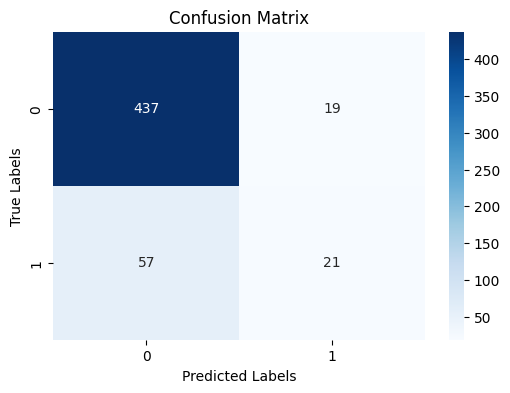

In [25]:
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [26]:
print('Model Accuracy:', accuracy_score(y_true, y_pred))

Model Accuracy: 0.8576779026217228


In [27]:
print('recall: ', recall_score(y_true, y_pred))
print('precision: ', precision_score(y_true, y_pred))

recall:  0.2692307692307692
precision:  0.525


### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(transformed_data, y_train)

y_pred = rf_classifier.predict(transformed_data_test)

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9438202247191011


In [30]:
print('recall: ', recall_score(y_true, y_pred))
print('precision: ', precision_score(y_true, y_pred))

recall:  0.6410256410256411
precision:  0.9615384615384616


### K-Nearest Neighbours

In [31]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(transformed_data, y_train)

y_pred = knn_classifier.predict(transformed_data_test)

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8951310861423221


### Decision Tree

In [32]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2)


decision_tree.fit(transformed_data, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(transformed_data_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9213483146067416


## Inference

It's worth noting the substantial increase in accuracy achieved by each of these models, surpassing 0.85. This represents a significant improvement compared to our previous dataset where the accuracy was only 0.6. The models seem to have effectively learned from the data without any tuning!

1. The Decision Tree exhibits an accuracy of 0.92, while the Random Forest achieves an impressive accuracy of 0.94.

2. The KNN model achieves an accuracy of 0.89, whereas the Logistic Regression model, which performed the poorest this time, reaches an accuracy of 0.85.

Upon closer examination, the recall for the Logistic Regression and Random Forest models is 0.26 and 0.64, respectively. Precision appears to be satisfactory for the Random Forest model but not as much for the Logistic Regression model (0.96 and 0.52, respectively). Now, let's explore how much further improvement we can attain through the feature selection process.

## Feature Selection

In [33]:
importances = decision_tree.feature_importances_
importances.shape

(70,)

## Stage: 2

                   Feature  Importance
59        Total day charge    0.175318
51   International plan_No    0.153648
69  Customer service calls    0.146549
66      Total intl minutes    0.095676
57       Total day minutes    0.094031
..                     ...         ...
29                State_NE    0.000000
30                State_NH    0.000000
31                State_NJ    0.000000
32                State_NM    0.000000
35                State_OH    0.000000

[70 rows x 2 columns]


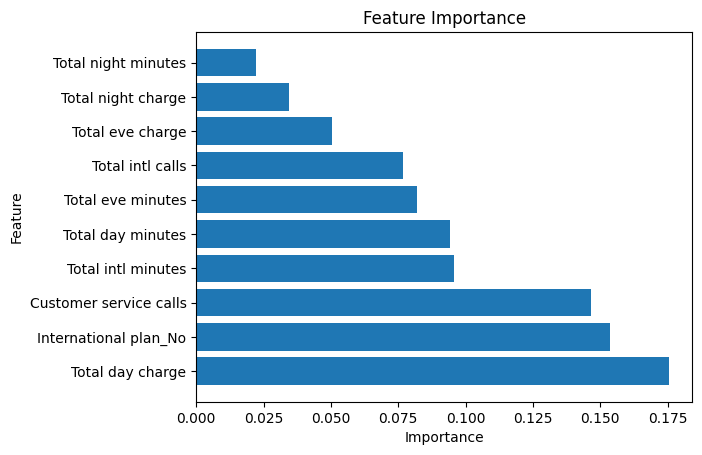

In [34]:
# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': importances})

# Sort the DataFrame by importance values in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot feature importances
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [35]:
indexed_feature_import = feature_importances.set_index('Feature')
indexed_feature_import= indexed_feature_import.T
indexed_feature_import.drop(columns=numerical_features, inplace=True)

In [36]:
indexed_feature_import = indexed_feature_import.T
indexed_feature_import.reset_index(inplace=True)

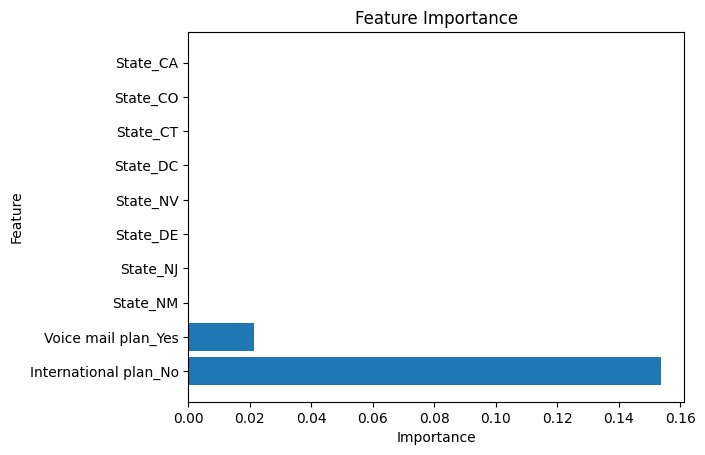

In [37]:
indexed_feature_import = indexed_feature_import.sort_values(by='Importance', ascending=False)

plt.barh(indexed_feature_import['Feature'][:10], indexed_feature_import['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

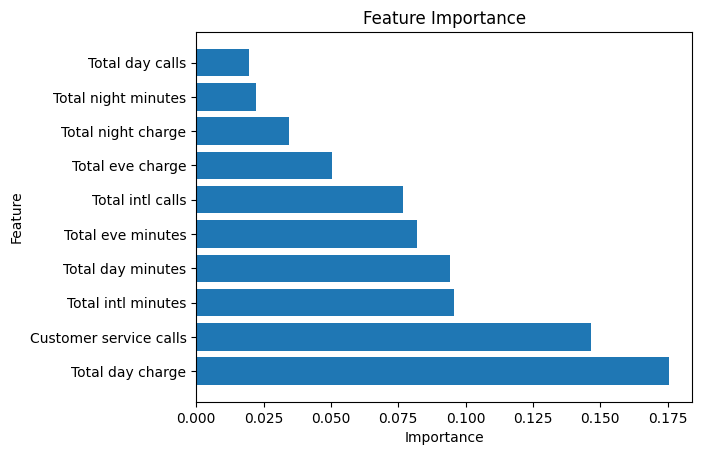

In [38]:
num_feature_importance = feature_importances[feature_importances['Feature'].isin(numerical_features)]
num_feature_importance = num_feature_importance.sort_values(by='Importance', ascending=False)

plt.barh(num_feature_importance['Feature'][:10], num_feature_importance['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

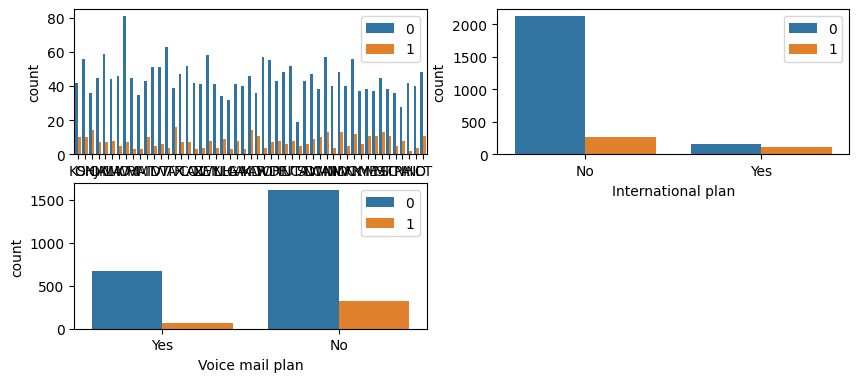

In [39]:
fig = plt.figure(figsize=(10, 20))
for i, cols in enumerate(categorical_features):
    ax = plt.subplot(9,2,i+1)
    sns.countplot(x= cols, hue="Churn", data=df_origin, ax=ax)
    plt.legend()
plt.show()

In [40]:
from scipy.stats import chi2_contingency

In [41]:
categorical_features

['State', 'International plan', 'Voice mail plan']

In [42]:
selected_cat_features = []
for feature in categorical_features:
    contingency_table = pd.crosstab(df_origin[feature], df_origin[target_column])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p <= 0.05:
        print(f"Chi-square test results for '{feature}':")
        print(f"Chi-square statistic: {chi2}")
        print(f"P-value: {p}")
        print("")
        selected_cat_features.append(feature)

Chi-square test results for 'State':
Chi-square statistic: 79.79859322636507
P-value: 0.004680701679944973

Chi-square test results for 'International plan':
Chi-square statistic: 202.682107174188
P-value: 5.4269405491147075e-46

Chi-square test results for 'Voice mail plan':
Chi-square statistic: 25.65625337995575
P-value: 4.079713016862758e-07



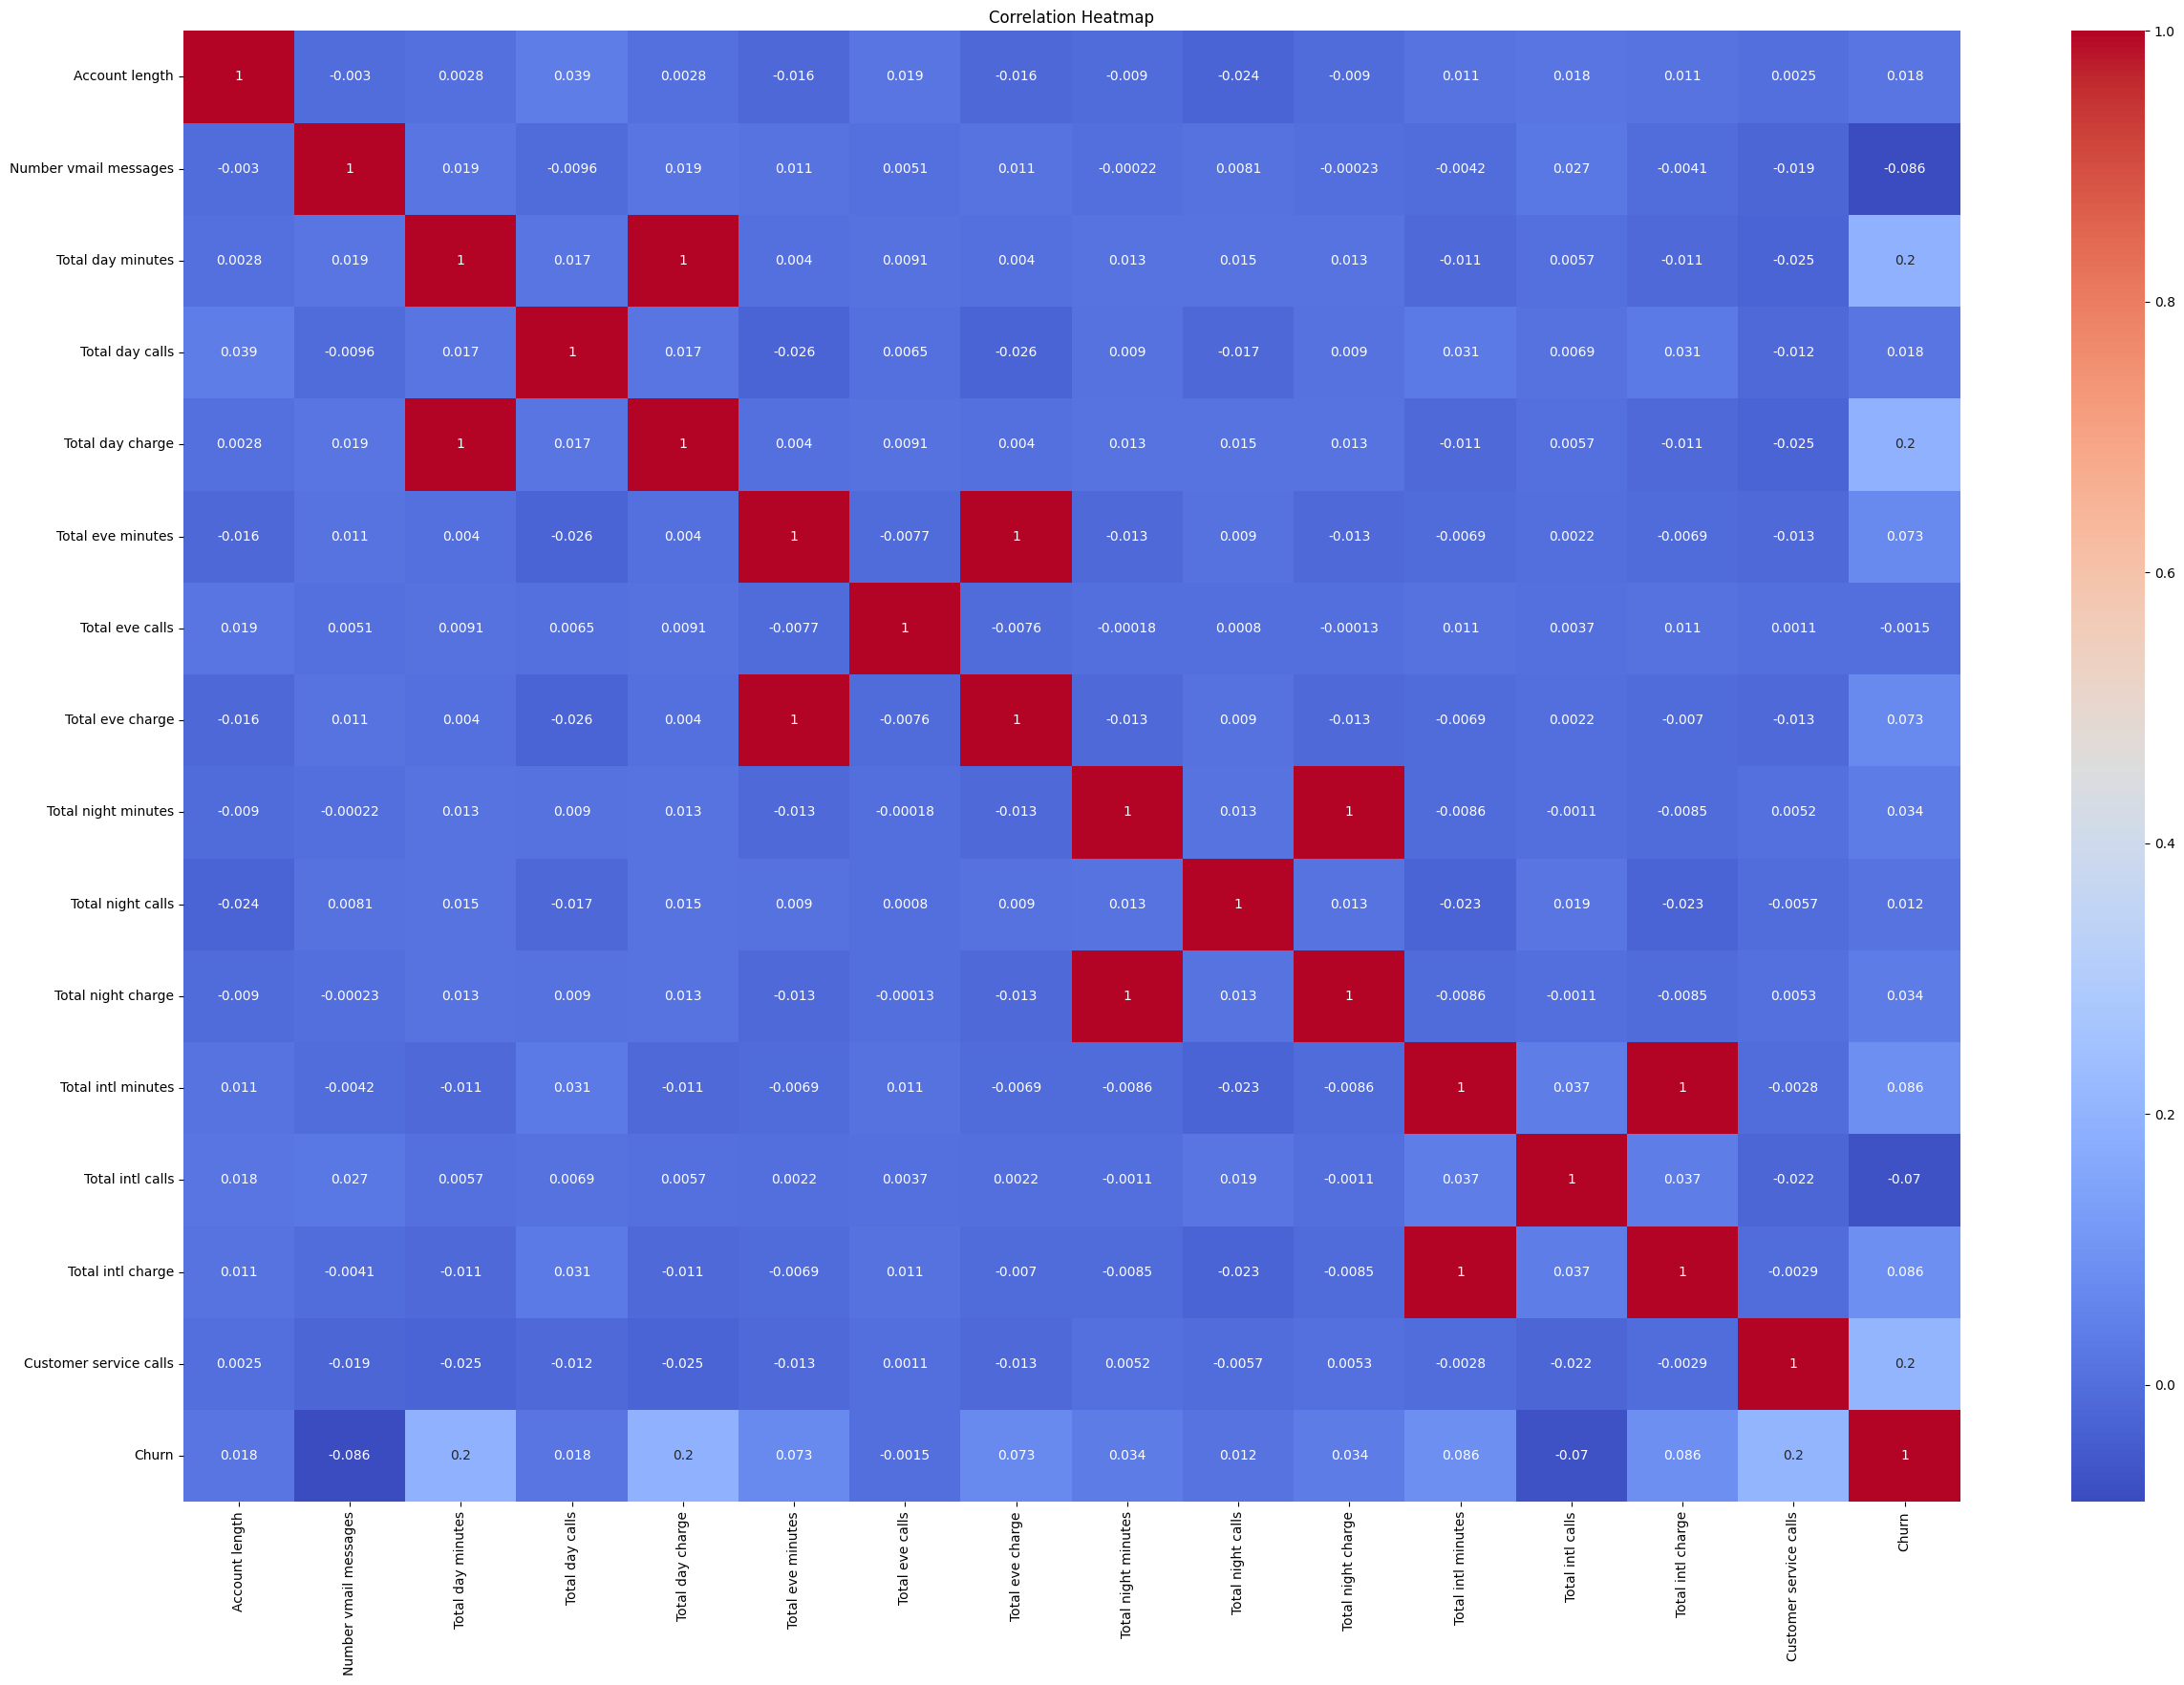

In [43]:
corr_matrix = df_origin.corr()

plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
corr_matrix[target_column]

Account length            0.017728
Number vmail messages    -0.086474
Total day minutes         0.195688
Total day calls           0.018290
Total day charge          0.195689
Total eve minutes         0.072906
Total eve calls          -0.001539
Total eve charge          0.072893
Total night minutes       0.033639
Total night calls         0.012262
Total night charge        0.033635
Total intl minutes        0.086204
Total intl calls         -0.069882
Total intl charge         0.086216
Customer service calls    0.202590
Churn                     1.000000
Name: Churn, dtype: float64

In [45]:
import scipy.stats as stats

In [46]:
selected_num_features = []
for features in numerical_features:
    numerical_variable = df_origin[features]
    categorical_variable = df_origin[target_column]

    correlation, p_value = stats.pointbiserialr(numerical_variable, categorical_variable)
    
    if correlation >= 0.1 or correlation <= -0.2 or p_value <= 0.04:

        print("Point Biserial Correlation Coefficient:", correlation)
        print("p-value:", p_value)
        selected_num_features.append(features)

Point Biserial Correlation Coefficient: -0.08647414333110284
p-value: 7.77707473635418e-06
Point Biserial Correlation Coefficient: 0.1956879262199363
p-value: 2.0234314567186054e-24
Point Biserial Correlation Coefficient: 0.19568892963967605
p-value: 2.0223209838425677e-24
Point Biserial Correlation Coefficient: 0.07290626808163178
p-value: 0.00016479681915989423
Point Biserial Correlation Coefficient: 0.07289326915576903
p-value: 0.00016524188933333424
Point Biserial Correlation Coefficient: 0.08620377131557026
p-value: 8.30377063681675e-06
Point Biserial Correlation Coefficient: -0.0698817041132962
p-value: 0.00030508061517142275
Point Biserial Correlation Coefficient: 0.08621611819915345
p-value: 8.278993407956543e-06
Point Biserial Correlation Coefficient: 0.20259025070423864
p-value: 4.318652841824647e-26


In [47]:
len(selected_cat_features), len(selected_num_features)

(3, 9)

In [48]:
len(categorical_features), len(numerical_features)

(3, 15)

## Extracting Selected Features and Preprocessing Data

In [49]:
all_selected_features = selected_cat_features + selected_num_features + [target_column]

In [50]:
df_selected = df_origin[all_selected_features]
df_selected.head()

,State,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,No,Yes,25,265.1,45.07,197.4,16.78,10.0,3,2.70,1,0
1,OH,No,Yes,26,161.6,27.47,195.5,16.62,13.7,3,3.70,1,0
2,NJ,No,No,0,243.4,41.38,121.2,10.30,12.2,5,3.29,0,0
3,OH,Yes,No,0,299.4,50.90,61.9,5.26,6.6,7,1.78,2,0
4,OK,Yes,No,0,166.7,28.34,148.3,12.61,10.1,3,2.73,3,0


In [51]:
df_2 = df_selected.copy()

df_y = df_2.pop(target_column)

# Categorical Features

data_types = df_2.dtypes
categorical_features = data_types[data_types == 'object'].index

# Numerical Features

data_types = df_2.dtypes
numerical_features = data_types[data_types != 'object'].index

In [52]:
categorical_features

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

### Data Splitting

In [53]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(df_2, df_y, test_size=0.2, random_state=44, stratify=df_y)

categorical_features = categorical_features.tolist()
numerical_features = numerical_features.tolist()

In [54]:
categorical_features

['State', 'International plan', 'Voice mail plan']

In [55]:
# Create transformers for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

pipeline.fit(x_train)
transformed_data = pipeline.transform(x_train)
transformed_data_test = pipeline.transform(x_test)

In [56]:
transformed_feature_names = pipeline.get_feature_names_out().tolist()

transformed_feature_names = strip_tag_transformer(transformed_feature_names)

## Model Fitting, Prediction and Evaluation

### Logistic Regression

In [57]:
lr = LogisticRegression(max_iter=1000).fit(transformed_data, y_train)

predictions = lr.predict(transformed_data_test)

In [58]:
y_true = y_test
y_pred = predictions
cm = confusion_matrix(y_true, y_pred)

cf_matrix = confusion_matrix(y_true, y_pred)

In [59]:
print('recall: ', recall_score(y_true, y_pred))
print('precision: ', precision_score(y_true, y_pred))

recall:  0.2564102564102564
precision:  0.5128205128205128


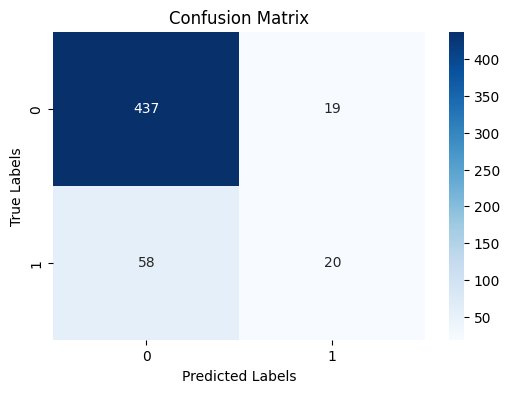

In [60]:
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [61]:
print('Model Accuracy:', accuracy_score(y_true, y_pred))

Model Accuracy: 0.8558052434456929


### Random Forest Classifier

In [62]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(transformed_data, y_train)

y_pred = rf_classifier.predict(transformed_data_test)

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.949438202247191


In [63]:
print('recall: ', recall_score(y_true, y_pred))
print('precision: ', precision_score(y_true, y_pred))

recall:  0.7051282051282052
precision:  0.9322033898305084


In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       456
           1       0.93      0.71      0.80        78

    accuracy                           0.95       534
   macro avg       0.94      0.85      0.89       534
weighted avg       0.95      0.95      0.95       534



## Inference

After carrying out the feature selection process we can see improvement in the models

The Random Forest has approximaate accuracy of 0.95 as against 0.94. But biggest leap is the recall, 0.70 from 0.64! Although at the cost of a drop in precision from 0.96 to 0.93

Sadly the Logistic Regression isn't having the best time, still having similar result. 

In the course of our data preprocessing we observed that the dataset has imbalanced classes. Hence, we will use a simple strategy to solve this. Random OverSampling!

## Random Sampling

In [66]:
df_selected.shape

(2666, 13)

### Using the OverSampling of Minority Class

In [67]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [68]:
# !pip install imblearn

In [69]:
x_train, x_test, y_train, y_test = train_test_split(df_2, df_y, test_size=0.2, random_state=44, stratify=df_y)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

oversample = RandomOverSampler(sampling_strategy='minority')
x_train, y_train = oversample.fit_resample(x_train, y_train)

(2132, 12) (2132,)
(534, 12) (534,)


In [70]:
y_train.value_counts()

0    1822
1    1822
Name: Churn, dtype: int64

In [71]:
# Create transformers for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

pipeline.fit(x_train)
transformed_data = pipeline.transform(x_train)
transformed_data_test = pipeline.transform(x_test)

transformed_feature_names = pipeline.get_feature_names_out().tolist()

transformed_feature_names = strip_tag_transformer(transformed_feature_names)

## Model Fitting, Prediction and Evaluation

### Logistic Regression

In [72]:
lr = LogisticRegression(max_iter=1000).fit(transformed_data, y_train)

y_pred = lr.predict(transformed_data_test)

In [73]:
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

cf_matrix = confusion_matrix(y_true, y_pred)

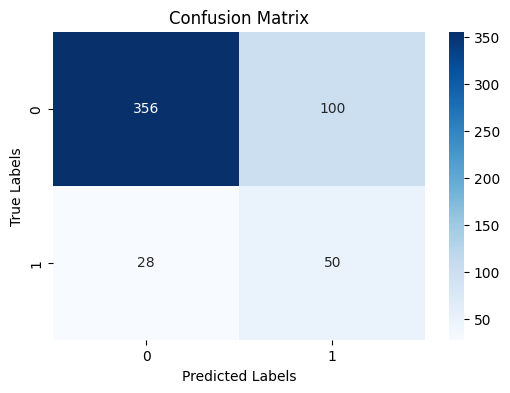

In [74]:
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [75]:
print('Model Accuracy:', accuracy_score(y_true, y_pred))

Model Accuracy: 0.7602996254681648


In [76]:
print('recall: ', recall_score(y_true, y_pred))
print('precision: ', precision_score(y_true, y_pred))

recall:  0.6410256410256411
precision:  0.3333333333333333


### Random Forest Classifier

In [77]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(transformed_data, y_train)

y_pred = rf_classifier.predict(transformed_data_test)

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.949438202247191


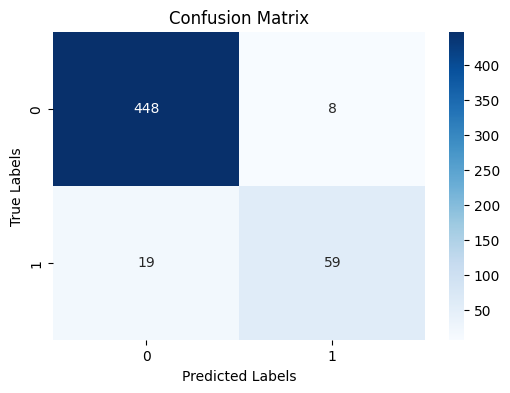

In [78]:
cm = confusion_matrix(y_true, y_pred)

cf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [79]:
print('recall: ', recall_score(y_true, y_pred))
print('precision: ', precision_score(y_true, y_pred))

recall:  0.7564102564102564
precision:  0.8805970149253731


In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       456
           1       0.88      0.76      0.81        78

    accuracy                           0.95       534
   macro avg       0.92      0.87      0.89       534
weighted avg       0.95      0.95      0.95       534



## Inference

Following random sampling, both models experienced significant changes in precision, with a notable drop. However, the recall values saw considerable improvements. For the Random Forest model, recall increased from 0.70 to 0.75, while the Logistic Regression model saw a rise from 0.52 to 0.64.

In terms of accuracy, the Logistic Regression model took a hit, decreasing from 0.85 to 0.76. Conversely, the Random Forest model maintained its high accuracy of 0.95.

### Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

2023-07-09 14:52:06.489025: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 14:52:06.631572: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-09 14:52:06.631593: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-09 14:52:07.381745: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Using Test Data from Directory

In [ ]:
df_t = pd.read_csv("data/churn-bigml-20.csv")
df_test = df_t[all_selected_features].copy()

oversample = RandomOverSampler(sampling_strategy='minority')
x_train, y_train = oversample.fit_resample(df_2, df_y)

y_test = df_test.pop(target_column)
x_test = df_test

In [ ]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

pipeline.fit(x_train)
transformed_data = pipeline.transform(x_train)
transformed_data_test = pipeline.transform(x_test)

transformed_feature_names = pipeline.get_feature_names_out().tolist()

transformed_feature_names = strip_tag_transformer(transformed_feature_names)

In [ ]:
y_train.value_counts()

0    2278
1    2278
Name: Churn, dtype: int64

In [ ]:
y_test.value_counts()

False    572
True      95
Name: Churn, dtype: int64

In [ ]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(transformed_data, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_classifier.predict(transformed_data)

accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
y_pred = rf_classifier.predict(transformed_data_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9475262368815592


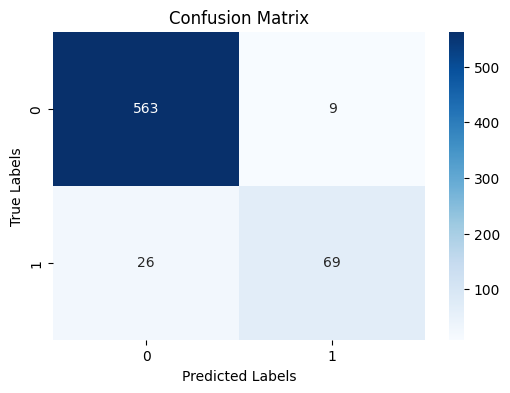

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       572
        True       0.88      0.73      0.80        95

    accuracy                           0.95       667
   macro avg       0.92      0.86      0.88       667
weighted avg       0.95      0.95      0.95       667



In [ ]:
x_train.shape

(4556, 12)

In [ ]:
# Build the model
model=keras.Sequential()
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(transformed_data.toarray(), y_train, epochs=40, batch_size=56, validation_data=(transformed_data_test.toarray(), y_test))

loss, accuracy = model.evaluate(transformed_data_test.toarray(), y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/40
82/82 [==============================] - 2s 17ms/step - loss: 0.3921 - accuracy: 0.8389 - val_loss: 0.4113 - val_accuracy: 0.8321
Epoch 2/40
82/82 [==============================] - 1s 16ms/step - loss: 0.2464 - accuracy: 0.9078 - val_loss: 0.2931 - val_accuracy: 0.9220
Epoch 3/40
82/82 [==============================] - 1s 16ms/step - loss: 0.1655 - accuracy: 0.9363 - val_loss: 0.2775 - val_accuracy: 0.9145
Epoch 4/40
82/82 [==============================] - 1s 16ms/step - loss: 0.1172 - accuracy: 0.9579 - val_loss: 0.3777 - val_accuracy: 0.9160
Epoch 5/40
82/82 [==============================] - 1s 16ms/step - loss: 0.0741 - accuracy: 0.9752 - val_loss: 0.3808 - val_accuracy: 0.9070
Epoch 6/40
82/82 [==============================] - 1s 15ms/step - loss: 0.0456 - accuracy: 0.9851 - val_loss: 0.4407 - val_accuracy: 0.9190
Epoch 7/40
82/82 [==============================] - 1s 15ms/step - loss: 0.0491 - accuracy: 0.9831 - val_loss: 0.4765 - val_accuracy: 0.9205
Epoch 8/40
82

## Conclusion

Upon concluding this notebook, we have observed significant improvements in each model's performance. It is evident that by leveraging the right data and implementing minor preprocessing techniques, satisfactory performance can be achieved in Machine Learning Models without extensive tuning.

The Random Forest model emerged as our preferred choice for this notebook, delivering consistent results even when introduced to new test data.

Considering the nature of our task, maximizing recall to enhance the classification of churned customers proves valuable.

### Recommendations

These notebooks, while informative, do not exhaust all possibilities for this type of classification task. One may consider:

1. Implementing more robust preprocessing techniques, such as outlier detection.
2. Exploring enhanced feature engineering strategies.
3. Introducing additional models like Support Vector Machine, XGBoost, etc.
4. Exploring hyperparameter tuning for further model refinement.

With these considerations in mind, it is crucial to recognize the significance of data quality over mere quantity and elaborate hyperparameter search spaces. This notebook serves as a testament to the importance of data quality in achieving successful outcomes.